# (IAT 460) Week 1 Lab — Introduction to Python, PyTorch, and data modalities

## 1. Lab Objectives

This lab is an **introduction to the materials and tools** we will use throughout the course.

You are not expected to:

- understand all the code

- remember every function

- optimize anything

You are encouraged to:

- observe

- experiment

- discuss

- interpret

## 2. Libraries

Python libraries are collections of tools created by others.

Today we will briefly tour several libraries:

- **Pillow** (images)

- **librosa** (audio)

- text processing tools

- **pretty_midi** / **symusic** (symbolic music)

- **PyTorch** (general-purpose computation & learning)

You will later choose **one medium** to experiment with.

### Python Setup

In [211]:
#Setup

!pip install pillow torch librosa pretty_midi torch torchvision torchaudio torchcodec matplotlib "numpy<2" datasets llvmlite==0.45.0

### Download resources

In [212]:
!wget -q https://github.com/IAT-ComputationalCreativity-Spring2026/Lab-1/raw/refs/heads/main/data.zip
!unzip -o data.zip
!rm data.zip

Archive:  data.zip
  inflating: data/MIDI/sample_midi.mid  
  inflating: data/images/sample_image.png  
  inflating: data/audio/sample_audio.wav  


## 3. Images as data (**Pillow**)

### 3.1 Load and display an image

Image Format: PNG
Image Size: (512, 512)
Image Mode: RGB


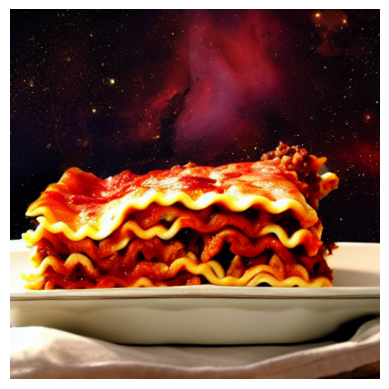

In [213]:
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt


img = Image.open("data/images/sample_image.png")

# Display image information
print("Image Format:", img.format)
print("Image Size:", img.size)
print("Image Mode:", img.mode)

def display(img):
    plt.imshow(img)
    plt.axis('off')

display(img)

### 3.2 Basic Image Transformations

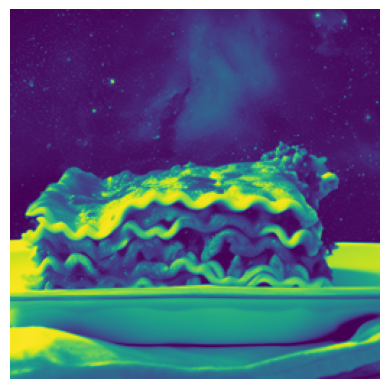

In [214]:
# Resize an image
img = img.resize((256, 256))
display(img)

# Rotate an image
rotated_img = img.rotate(45)
display(rotated_img)

# Convert image to different modes
grayscale_img = img.convert('L')
display(grayscale_img)

### 3.3 Image Filtering

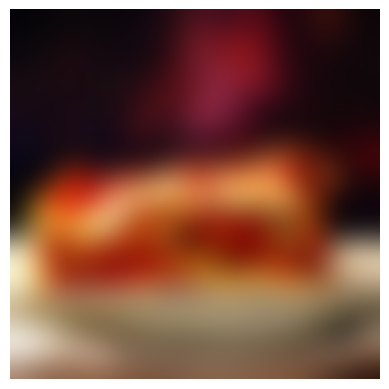

In [215]:
# Apply built-in filters
blurred_img = img.filter(ImageFilter.BLUR)
display(blurred_img)

sharp_img = img.filter(ImageFilter.SHARPEN)
display(sharp_img)

edge_enhanced_img = img.filter(ImageFilter.EDGE_ENHANCE)
display(edge_enhanced_img)

# Create a custom blur
custom_blur = ImageFilter.GaussianBlur(radius=10)
gaussian_blurred = img.filter(custom_blur)
display(gaussian_blurred)

### 3.4 Image Enhancement

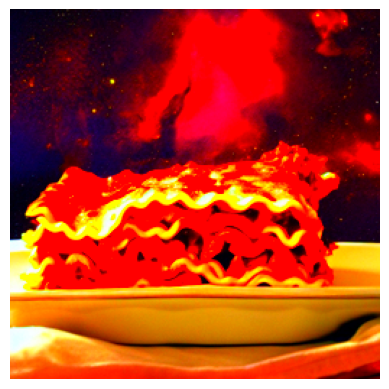

In [216]:
# Adjust brightness
brightness_enhancer = ImageEnhance.Brightness(img)
brightened_img = brightness_enhancer.enhance(5)
display(brightened_img)

# Adjust contrast
contrast_enhancer = ImageEnhance.Contrast(img)
high_contrast_img = contrast_enhancer.enhance(5)
display(high_contrast_img)

# Adjust color
color_enhancer = ImageEnhance.Color(img)
saturated_img = color_enhancer.enhance(5)
display(saturated_img)

### 3.5 Cropping and Copying

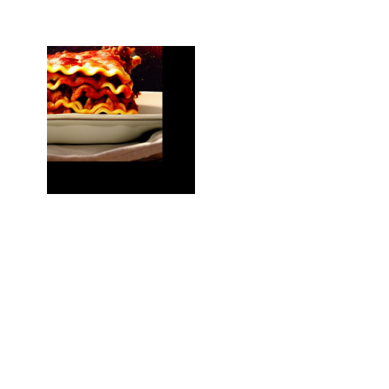

In [217]:
# Crop an image
# Syntax: img.crop((left, upper, right, lower))
cropped_img = img.crop((100, 100, 300, 300))
display(cropped_img)


# Paste one image onto another
background = Image.new('RGB', (500, 500), color='white')
background.paste(cropped_img, (50, 50))
display(background)

### 3.6 Saving Images

In [218]:
import os

# Create a directory for outputs if it doesn't exist
os.makedirs('outputs/images', exist_ok=True)

# Save images in different formats
img.save('outputs/images/output_image.png')
img.save('outputs/images/output_image.jpg', quality=95)

### 3.7 Image Composition and Blending

In [219]:

overlay = Image.new('RGBA', img.size, (255, 255, 255, 128))
blended_img = Image.alpha_composite(img.convert('RGBA'), overlay)

### 3.8 Advanced drawing

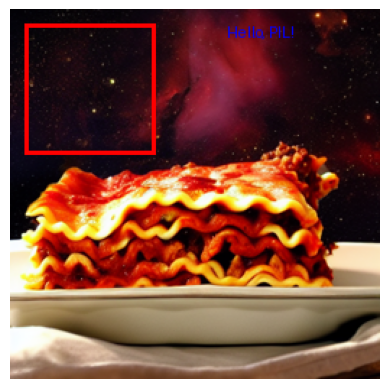

In [220]:
from PIL import ImageDraw, ImageFont

# Create a drawing context
draw_img = img
draw = ImageDraw.Draw(draw_img)

# Draw a rectangle
draw.rectangle([10, 10, 100, 100], outline='red', width=3)
display(draw_img)

# Draw text
draw.text((150, 10), "Hello, PIL!", fill='blue')
display(draw_img)

/tmp/ipython-input-2585515240.py:19: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  red_image = Image.fromarray(red_grad, 'RGB')
/tmp/ipython-input-2585515240.py:21: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  green_image = Image.fromarray(green_grad, 'RGB')
/tmp/ipython-input-2585515240.py:23: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  blue_image = Image.fromarray(blue_grad, 'RGB')
/tmp/ipython-input-2585515240.py:25: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  full_image = Image.fromarray(full_grad, 'RGB')


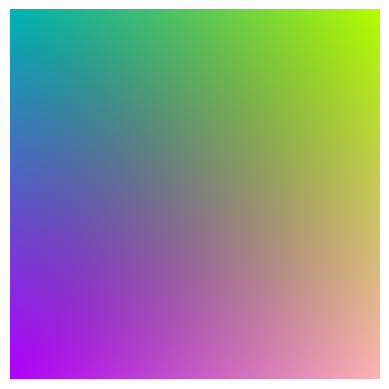

In [221]:
from PIL import Image
import numpy as np

height, width, channels = 256, 256, 3

gradient = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        gradient[i,j] = np.floor((0.5*(i/height)**2 + 0.5*(j/width)**2)**(1/2) * 255)

black = np.zeros((height, width), dtype=np.uint8)

red_grad = np.stack([gradient, black, black], axis=-1)
green_grad = np.stack([black, gradient[::-1,:], black], axis=-1)
blue_grad = np.stack([black, black, gradient[:,::-1]], axis=-1)

full_grad = red_grad + green_grad + blue_grad

red_image = Image.fromarray(red_grad, 'RGB')
display(red_image)
green_image = Image.fromarray(green_grad, 'RGB')
display(green_image)
blue_image = Image.fromarray(blue_grad, 'RGB')
display(blue_image)
full_image = Image.fromarray(full_grad, 'RGB')
display(full_image)

## 4. Audio as Data (**librosa**)

### 4.1 Load Audio

In [222]:
import librosa
from IPython.display import Audio
import numpy as np


signal, sr = librosa.load("data/audio/sample_audio.wav", sr=None)
Audio(signal, rate=sr)

### 4.2 Visual representations

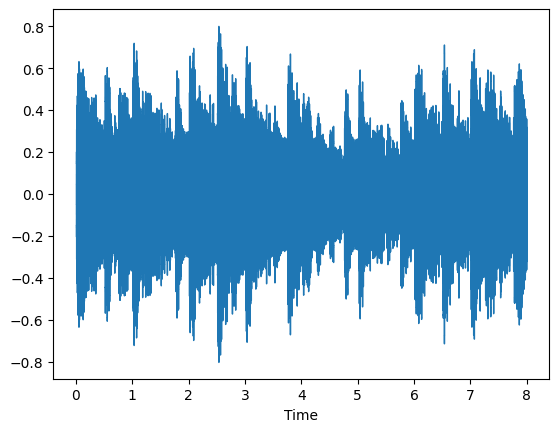

In [223]:
# Waveform
librosa.display.waveshow(signal, sr=sr)

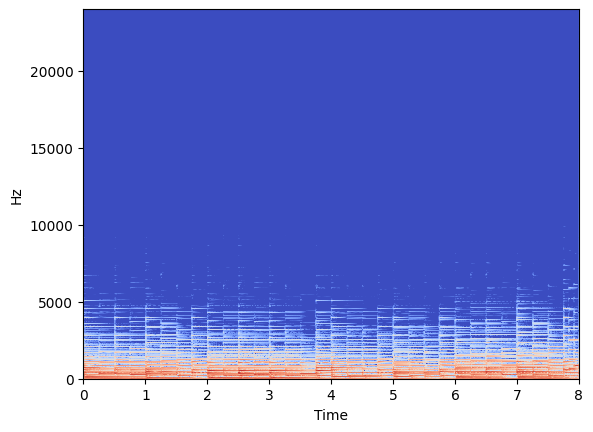

In [224]:
# Spectrogram
S = librosa.amplitude_to_db(np.abs(librosa.stft(signal)))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='hz')

### 4.3 Features

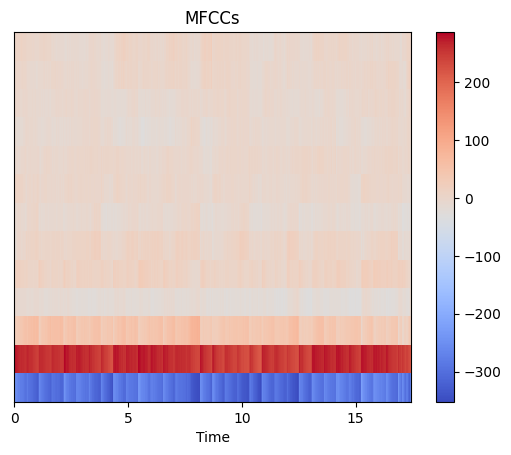

In [225]:
mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.show()

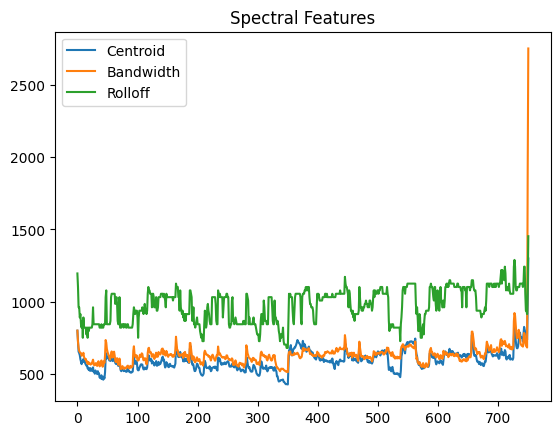

In [226]:
centroid = librosa.feature.spectral_centroid(y=signal, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)

plt.plot(centroid.T, label="Centroid")
plt.plot(bandwidth.T, label="Bandwidth")
plt.plot(rolloff.T, label="Rolloff")
plt.legend()
plt.title("Spectral Features")
plt.show()

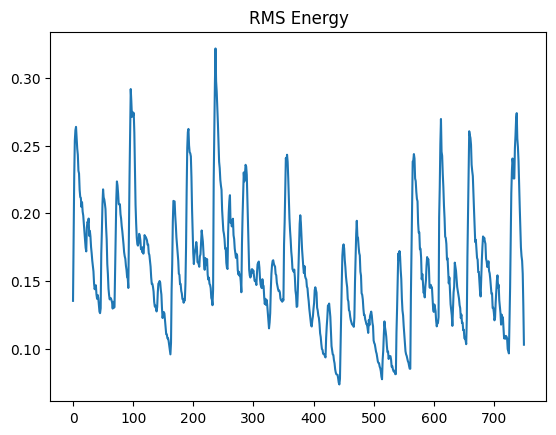

In [227]:
rms = librosa.feature.rms(y=signal)

plt.plot(rms.T)
plt.title("RMS Energy")
plt.show()

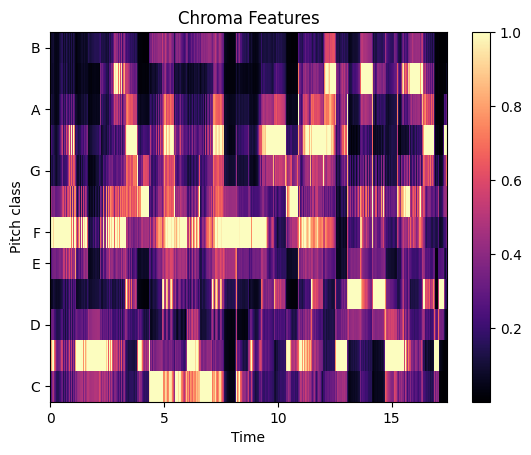

In [228]:
chroma = librosa.feature.chroma_stft(y=signal, sr=sr)

librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

### 4.4 Onset Detection

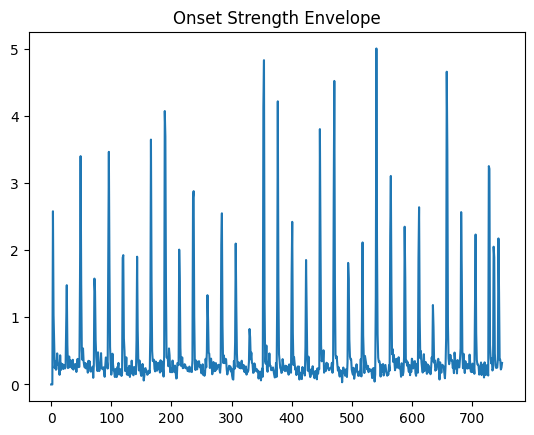

In [229]:
onset_env = librosa.onset.onset_strength(y=signal, sr=sr)

plt.plot(onset_env)
plt.title("Onset Strength Envelope")
plt.show()

In [230]:
onsets = librosa.onset.onset_detect(
    onset_envelope=onset_env,
    sr=sr,
    units="time"
)

print(onsets)

[0.032      0.26666667 0.512      0.768      1.01333333 1.26933333
 1.52533333 1.77066667 2.016      2.272      2.51733333 2.77333333
 3.01866667 3.27466667 3.52       3.76533333 4.01066667 4.26666667
 4.52266667 4.768      5.01333333 5.26933333 5.51466667 5.76
 6.016      6.272      6.51733333 6.77333333 7.01866667 7.27466667
 7.52       7.76533333 7.85066667 7.936     ]


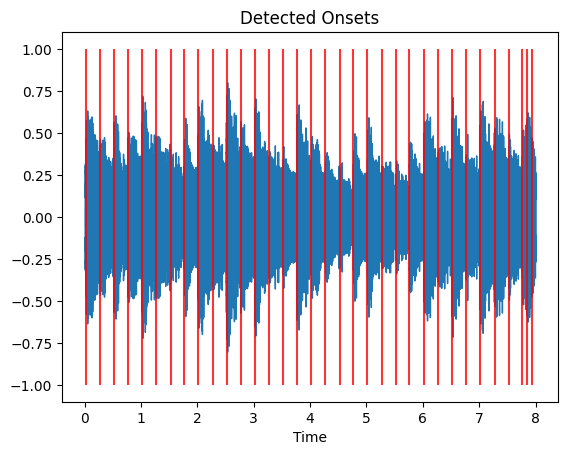

In [231]:
librosa.display.waveshow(signal, sr=sr)
plt.vlines(onsets, -1, 1, color='r', alpha=0.8)
plt.title("Detected Onsets")
plt.show()

### 4.5 Tempo and beats

In [232]:
tempo, beats = librosa.beat.beat_track(y=signal, sr=sr)

print(f"Estimated tempo: {tempo[0]:.2f} BPM")

Estimated tempo: 119.68 BPM


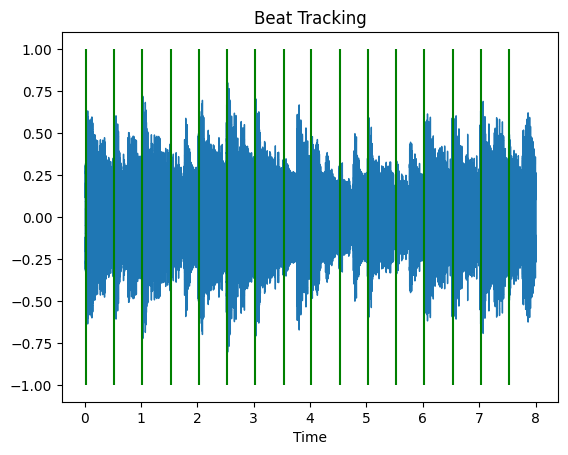

In [233]:
beat_times = librosa.frames_to_time(beats, sr=sr)

librosa.display.waveshow(signal, sr=sr)
plt.vlines(beat_times, -1, 1, color='g')
plt.title("Beat Tracking")
plt.show()

### 4.6 Audio Effects

In [234]:
# Time Stretching

signal_fast = librosa.effects.time_stretch(signal, rate=1.5)
Audio(signal_fast, rate=sr)

In [235]:
# Pitch Shifting

signal_pitch_up = librosa.effects.pitch_shift(signal, sr=sr, n_steps=4)
Audio(signal_pitch_up, rate=sr)

### 4.7 Synthesis

In [236]:
sr = 22050        # samples per second
duration = 2.0   # seconds

t = np.linspace(0, duration, int(sr * duration), endpoint=False)

freq = 440.0  # A4
y_sine = 0.5 * np.sin(2 * np.pi * freq * t)

Audio(y_sine, rate=sr)

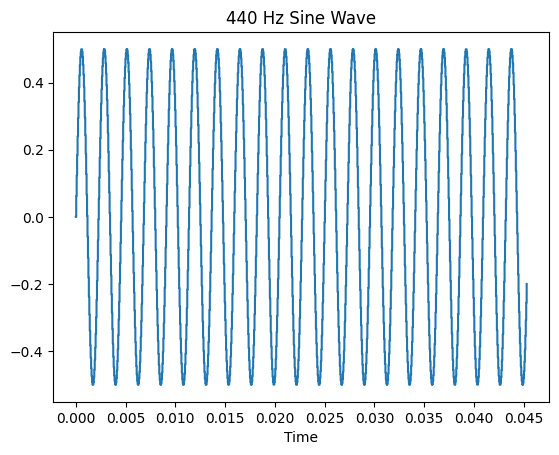

In [237]:
librosa.display.waveshow(y_sine[:1000], sr=sr)
plt.title("440 Hz Sine Wave")
plt.show()

In [238]:
y_square = 0.05 * np.sign(np.sin(2 * np.pi * freq * t))
Audio(y_square, rate=sr)

## 5. Symbolic Music

*Credit: https://github.com/craffel/pretty-midi/blob/main/Tutorial.ipynb*

### 5.1 Creating MIDI from scratch

In [239]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

In [240]:
pm = pretty_midi.PrettyMIDI(initial_tempo=100)

### 5.2 Adding a MIDI instrument

In [241]:
instrument = pretty_midi.Instrument(
    program=pretty_midi.instrument_name_to_program("Cello"),
    name="Cello"
)

pm.instruments.append(instrument)

### 5.3 Adding notes

In [242]:
notes = [
    (60, 0.0, 0.8),  # C4
    (62, 0.8, 1.6),  # D4
    (64, 1.6, 2.4),  # E4
]

for pitch, start, end in notes:
    note = pretty_midi.Note(
        velocity=90,
        pitch=pitch,
        start=start,
        end=end
    )
    instrument.notes.append(note)

### 5.4 Pitch Bends

In [243]:
n_steps = 200
bend_range = pretty_midi.semitones_to_pitch_bend(1.0)
for time, pitch in zip(np.linspace(1.5, 2.3, n_steps),
                       range(0, bend_range, bend_range//n_steps)):
    instrument.pitch_bends.append(pretty_midi.PitchBend(pitch, time))

### 5.5 Visualization

In [244]:
def plot_piano_roll(pm, pitch_min=48, pitch_max=72, fs=100):
    roll = pm.get_piano_roll(fs=fs)[pitch_min:pitch_max]
    librosa.display.specshow(
        roll,
        hop_length=1,
        sr=fs,
        x_axis="time",
        y_axis="cqt_note",
        fmin=pretty_midi.note_number_to_hz(pitch_min)
    )
    plt.colorbar(label="Velocity")

/tmp/ipython-input-1576225653.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(


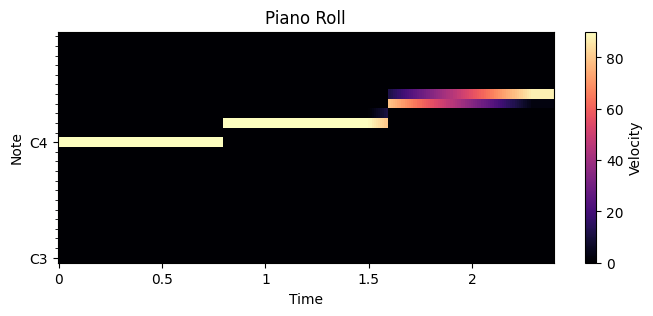

In [245]:
plt.figure(figsize=(8, 3))
plot_piano_roll(pm)
plt.title("Piano Roll")
plt.show()

### 5.6 Synthesis (sine waves)

In [246]:
Audio(pm.synthesize(fs=16000), rate=16000)

### 5.7 Saving and opening MIDI file

In [247]:
os.makedirs('outputs/MIDI', exist_ok=True)

pm.write("outputs/MIDI/example_generated.mid")

In [248]:
pm = pretty_midi.PrettyMIDI("data/MIDI/sample_midi.mid")

print(f"Number of instruments: {len(pm.instruments)}")
print(f"Total duration: {pm.get_end_time():.2f}s")

for i, inst in enumerate(pm.instruments):
    print(f"Instrument {i}: {inst.name}, notes = {len(inst.notes)}")

Number of instruments: 1
Total duration: 8.00s
Instrument 0: Track 0, notes = 79


/tmp/ipython-input-1576225653.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(


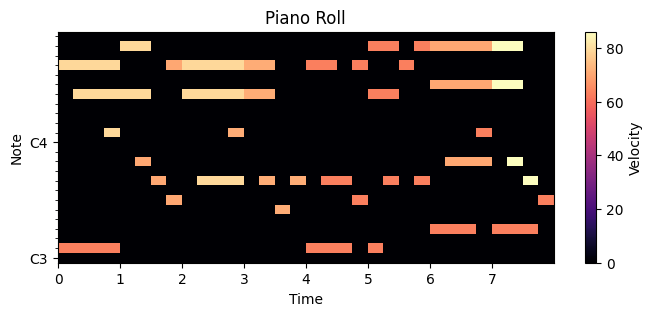

In [249]:
plt.figure(figsize=(8, 3))
plot_piano_roll(pm)
plt.title("Piano Roll")
plt.show()

In [250]:
Audio(pm.synthesize(fs=16000), rate=16000)

### 5.8 Time, Beats and Tempo

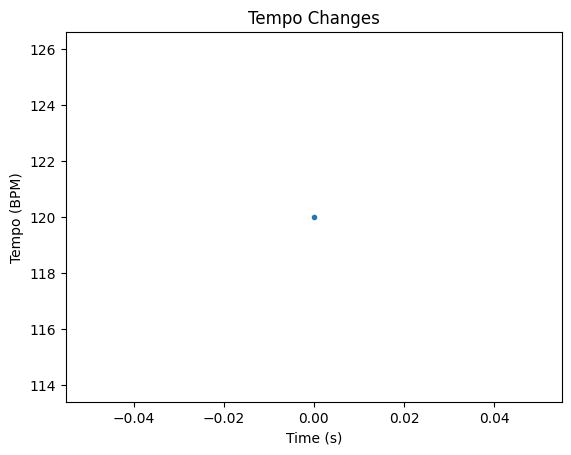

In [251]:
times, tempi = pm.get_tempo_changes()

plt.plot(times, tempi, ".-")
plt.xlabel("Time (s)")
plt.ylabel("Tempo (BPM)")
plt.title("Tempo Changes")
plt.show()

In [252]:
beats = pm.get_beats()
downbeats = pm.get_downbeats()

print("First 5 beats:", beats[:5])
print("First 5 downbeats:", downbeats[:5])

First 5 beats: [0.  0.5 1.  1.5 2. ]
First 5 downbeats: [0. 2. 4. 6.]


### 5.9 Manipulating the data

In [253]:
# Transposing all notes

for inst in pm.instruments:
    if inst.is_drum:
        continue
    for note in inst.notes:
        note.pitch += 2

# Time stretch

length = pm.get_end_time()
pm.adjust_times(
    original_times=[0, length],
    new_times=[0, length * 1.2]
)

In [254]:
Audio(pm.synthesize(fs=16000), rate=16000)

### 5.10 Harmonic analysis

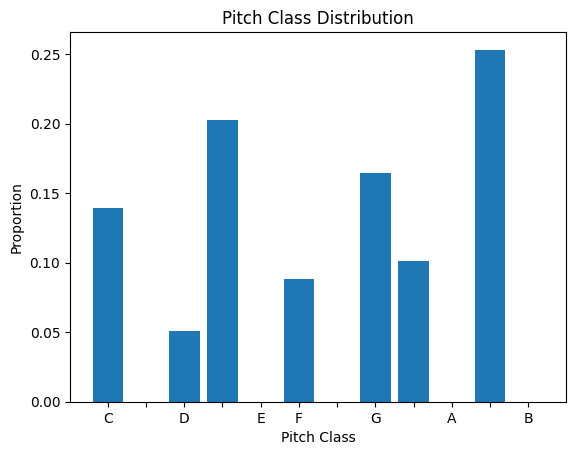

In [255]:
hist = pm.get_pitch_class_histogram()

plt.bar(np.arange(12), hist)
plt.xticks(np.arange(12), ['C', '', 'D', '', 'E', 'F', '', 'G', '', 'A', '', 'B'])
plt.xlabel("Pitch Class")
plt.ylabel("Proportion")
plt.title("Pitch Class Distribution")
plt.show()

## 6. PyTorch

### 6.1 Tensors

In [256]:
import torch

# Create a tensor from a list
tensor_from_list = torch.tensor([1, 2, 3, 4])
print("Tensor from list:", tensor_from_list)

# Create a tensor of zeros
zeros_tensor = torch.zeros(3, 3)
print("Zeros tensor:")
print(zeros_tensor)

# Create a tensor of ones
ones_tensor = torch.ones(2, 4)
print("Ones tensor:")
print(ones_tensor)

# Create a random tensor
random_tensor = torch.rand(2, 3)
print("Random tensor:")
print(random_tensor)

Tensor from list: tensor([1, 2, 3, 4])
Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Ones tensor:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Random tensor:
tensor([[0.4890, 0.5385, 0.8018],
        [0.4958, 0.8164, 0.8988]])


### 6.2 Tensor Types

In [257]:
# Tensor data types
float_tensor = torch.tensor([1.0, 2.0, 3.0])
print("Float tensor:", float_tensor.dtype)

int_tensor = torch.tensor([1, 2, 3])
print("Int tensor:", int_tensor.dtype)

# Convert types
converted_tensor = float_tensor.to(torch.int32)
print("Converted to int32:", converted_tensor.dtype)

# Double precision
double_tensor = torch.tensor([1.0, 2.0], dtype=torch.float64)
print("Double tensor:", double_tensor.dtype)

Float tensor: torch.float32
Int tensor: torch.int64
Converted to int32: torch.int32
Double tensor: torch.float64


### 6.3 Device

In [258]:
# Check available device
print(f"Is cuda available? {'yes' if torch.cuda.is_available() else 'no'}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

# Create tensor on CPU
cpu_tensor = torch.tensor([1, 2, 3])
print("CPU tensor device:", cpu_tensor.device)

# Move tensor to device
tensor_on_device = cpu_tensor.to(device)
print("Tensor on device:", tensor_on_device.device)

# If CUDA is available, demonstrate
if torch.cuda.is_available():
    cuda_tensor = torch.tensor([1, 2, 3]).cuda()
    print("CUDA tensor device:", cuda_tensor.device)
else:
    print("CUDA not available, using CPU")

Is cuda available? no
Device: cpu
CPU tensor device: cpu
Tensor on device: cpu
CUDA not available, using CPU


### 6.4 Modules

In [259]:
import torch.nn as nn

# Define a simple neural network module
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.linear = nn.Linear(10, 5)  # Simple linear layer

    def forward(self, x):
        return self.linear(x)

# Create an instance
model = SimpleNet()
print("Model:", model)

# Create some input
input_tensor = torch.randn(1, 10)
print("Input shape:", input_tensor.shape)

# Forward pass
output = model(input_tensor)
print("Output shape:", output.shape)
print("Output:", output)

# Move model to device
model.to(device)
print("Model device:", next(model.parameters()).device)

Model: SimpleNet(
  (linear): Linear(in_features=10, out_features=5, bias=True)
)
Input shape: torch.Size([1, 10])
Output shape: torch.Size([1, 5])
Output: tensor([[ 0.4840,  0.3671, -0.1502,  0.2176, -0.3694]],
       grad_fn=<AddmmBackward0>)
Model device: cpu


## 7. Useful Datasets

### 7.1 Image Datasets

/tmp/ipython-input-1303790451.py:11: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  full_image = Image.fromarray(img, 'RGB')


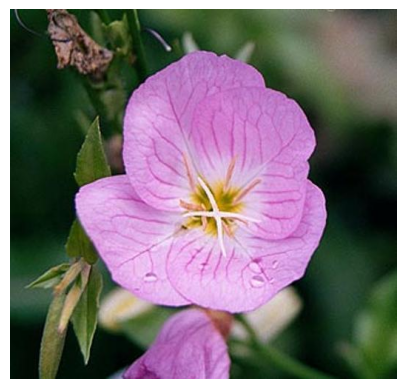

In [260]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor()])
flowers = datasets.Flowers102(root='./datasets', split="test", download=True, transform=transform)

# Display a sample
import matplotlib.pyplot as plt
img = flowers[0][0].permute(1,2,0).numpy() * 255
img = img.astype(np.uint8)
full_image = Image.fromarray(img, 'RGB')
display(full_image)

### 7.2 Audio Datasets

In [261]:
import torchaudio.datasets as audio_datasets

# LibriSpeech dataset (speech)
yesno_audio = audio_datasets.YESNO(root='./datasets', download=True)
print("YESNO dataset size:", len(yesno_audio))

# Display sample info
waveform, sample_rate, labels = yesno_audio[0]
print("Sample rate:", sample_rate)
print("Waveform shape:", waveform.shape)

Audio(waveform, rate=sample_rate)

YESNO dataset size: 60
Sample rate: 8000
Waveform shape: torch.Size([1, 50800])


### 7.3 Text Datasets

In [262]:
# Text datasets - using Hugging Face datasets for simplicity
from datasets import load_dataset

# WikiText-2 dataset
ts = load_dataset("Trelis/tiny-shakespeare", split="train")
print("tiny-shakespeare train size:", len(ts))

# Sample text
print("Sample text:", ts[0]['Text'][:200])

tiny-shakespeare train size: 472
Sample text: First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


## 8. Creative Transformations with PyTorch Modules

In this section, you will pick a modality (image, audio, text, or MIDI) and implement creative transformations using PyTorch's `nn.Module`. The transformations should be encapsulated within a module that can process your chosen data type.

### Instructions:
1. Choose a modality and dataset (from section 7 or custom data)
2. Implement a `Transformation` class that inherits from `nn.Module`
3. Define transformations as layers within the module (e.g., rotations, filter, anything you want...)
4. Load or generate placeholder data
5. Apply the transformations and observe the results

### 8.1 Placeholder Implementation

In [264]:
import torch
import torch.nn as nn

class Transformation(nn.Module):

    def __init__(self):
        super(Transformation, self).__init__()
        # Add arguments here...

    def forward(self, x):

        # Placeholder forward pass
        # implement your transformation logic

        return x

# Create data or use dataset
data = None

# Initialize the model
model = Transformation()

# Apply transformation
with torch.no_grad():
    transformed_data = model(data)
    print(f"Input data: {data}")
    print(f"Output data: {transformed_data}")

Input data: None
Output data: None


### 8.2 Example

In [265]:
BPM = 120
SECONDS_PER_BEAT = 60 / BPM

N_BARS = 4
STEPS_PER_BAR = 16          # 16th notes
N_STEPS = N_BARS * STEPS_PER_BAR

STEP_DURATION = SECONDS_PER_BEAT / 4

N_MOTIF = 8

In [266]:
class MidiTransformation(nn.Module):
    """
    Input: tensor of shape (5,)
    Output: pretty_midi.PrettyMIDI object
    """

    def __init__(self):
        super().__init__()

        # Musical materials
        self.scale = [60, 62, 64, 67, 69]  # C major pentatonic
        self.base_velocity = 40
        self.max_velocity = 110

    def forward(self, x):
        """
        x[0] = density
        x[1] = register
        x[2] = velocity energy
        x[3] = rhythmic variation
        x[4] = motif repetition
        """

        density, register, energy, rhythm_var, repetition = x

        # Create MIDI container
        pm = pretty_midi.PrettyMIDI(initial_tempo=BPM)
        instrument = pretty_midi.Instrument(
            program=pretty_midi.instrument_name_to_program("Electric Piano 1")
        )

        # Pitch register mapping
        octave_shift = int(register.item())
        pitch_pool = [p + 12 * octave_shift for p in self.scale]

        # Create a repeating motif
        motif_length = N_MOTIF
        motif = torch.randint(0, len(pitch_pool), (motif_length,))

        time = 0.0

        for step in range(N_STEPS):

            # --- NOTE DENSITY ---
            if torch.rand(1).item() > density.item():
                time += STEP_DURATION
                continue  # rest

            # --- RHYTHMIC VARIATION ---
            duration_factor = 1.0
            if torch.rand(1).item() < rhythm_var.item():
                duration_factor = np.random.choice(
                    torch.tensor([0.5, 1.0, 1.5])
                ).item()

            duration = STEP_DURATION * duration_factor

            # --- MOTIF VS VARIATION ---
            if torch.rand(1).item() < repetition.item():
                pitch = pitch_pool[motif[step % motif_length]]
            else:
                pitch = pitch_pool[torch.randint(0, len(pitch_pool), (1,)).item()]

            # --- VELOCITY ---
            velocity = int(
                self.base_velocity +
                energy.item() * (self.max_velocity - self.base_velocity) *
                torch.rand(1).item()
            )

            note = pretty_midi.Note(
                pitch=int(pitch),
                velocity=velocity,
                start=time,
                end=time + duration
            )

            instrument.notes.append(note)
            time += STEP_DURATION

        pm.instruments.append(instrument)
        return pm


In [267]:
# [density, register, energy, rhythm_variation, repetition]
control = torch.tensor([
    0.7,  # fairly dense
    0,  # mid register
    0.8,  # energetic
    0.3,  # mostly straight rhythm
    0.0   # some repetition
])

model = MidiTransformation()

with torch.no_grad():
    pm = model(control)

/tmp/ipython-input-4059150823.py:5: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(


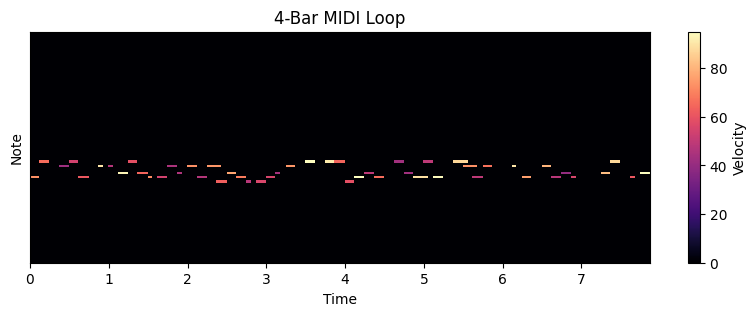

In [268]:
n_min, n_max = 24, 128

plt.figure(figsize=(10, 3))
roll = pm.get_piano_roll(fs=100)[n_min: n_max]
librosa.display.specshow(
    roll,
    sr=100,
    hop_length=1,
    x_axis="time",
    y_axis="cqt_note",
    fmin=pretty_midi.note_number_to_hz(n_min)
)
plt.title("4-Bar MIDI Loop")
plt.colorbar(label="Velocity")
plt.show()

In [269]:
Audio(pm.synthesize(fs=16000), rate=16000)